In [1]:
! pip install datasets transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [6]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer, TFAutoModelForSequenceClassification ,DistilBertTokenizer
from datasets import load_dataset

In [55]:
model = TFAutoModel.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [56]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [57]:
inputs = tokenizer(['Hello world', 'Hi how are you'], padding=True, truncation=True,
                  return_tensors='tf')
inputs
# Padding is set true, so you can see the first list in the first array will have to zeros in the end to fit the same token length as the second sentence
# The second array is the masking
# Truncation will truncate any sentence that exceeds 512 words

{'input_ids': <tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 101, 7592, 2088,  102,    0,    0],
       [ 101, 7632, 2129, 2024, 2017,  102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [58]:
output = model(inputs)
output
# later on we convert logits using softmax for classification
# We will only be using the pooler output

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(2, 6, 768), dtype=float32, numpy=
array([[[-0.16888338,  0.13606317, -0.13940048, ..., -0.6251124 ,
          0.05217258,  0.36714536],
        [-0.36327428,  0.14121838,  0.8799863 , ...,  0.1043303 ,
          0.2887567 ,  0.37267867],
        [-0.6985949 , -0.69879764,  0.06450213, ..., -0.22103655,
          0.00986852, -0.5939797 ],
        [ 0.83098346,  0.1236672 , -0.15119052, ...,  0.10309628,
         -0.6779264 , -0.26285213],
        [-0.40266627, -0.01928282,  0.5732499 , ..., -0.20656854,
          0.02338545,  0.20126297],
        [-0.6228407 , -0.2745354 ,  0.18117562, ..., -0.12944865,
         -0.03839097, -0.05733195]],

       [[ 0.09286568, -0.02636383, -0.12239324, ..., -0.21063548,
          0.17386365,  0.17250982],
        [ 0.40742064, -0.05931018,  0.5523468 , ..., -0.6790569 ,
          0.65557426, -0.29456508],
        [-0.21155252, -0.6858645 , -0.46280813, ...,  0.1527852 

In [59]:
data = load_dataset('SetFit/emotion')

Repo card metadata block was not found. Setting CardData to empty.


In [60]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [61]:
data['train'][0]

{'text': 'i didnt feel humiliated', 'label': 0, 'label_text': 'sadness'}

In [62]:
def tokenize(batch):
  return tokenizer(batch['text'],padding=True,truncation=True)
# function to tokenize the sentence in my dataset

In [63]:
data_encoded = data.map(tokenize,batched=True,batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [64]:
data_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [83]:
data_encoded['train']['text'][2]

'im grabbing a minute to post i feel greedy wrong'

In [66]:
# setting 'input_ids', 'attention_mask', 'token_type_ids', and 'label'
# to the tensorflow format. Now if you access this dataset you will get these
# columns in `tf.Tensor` format

data_encoded.set_format('tf',
                            columns=['input_ids', 'attention_mask', 'label'])

# setting BATCH_SIZE to 64.
BATCH_SIZE = 64

def order(inp):
    '''
    This function will group all the inputs of BERT
    into a single dictionary and then output it with
    labels.
    '''
    data = list(inp.values())
    return {
        'input_ids': data[1],
        'attention_mask': data[2],
    }, data[0]

# converting train split of `data_encoded` to tensorflow format
train_dataset = tf.data.Dataset.from_tensor_slices(data_encoded['train'][:])
# set batch_size and shuffle
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)
# map the `order` function
train_dataset = train_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

# ... doing the same for test set ...
test_dataset = tf.data.Dataset.from_tensor_slices(data_encoded['test'][:])
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

In [67]:
class BERTForClassification(tf.keras.Model):

    def __init__(self, bert_model, num_classes):
        super().__init__()
        self.bert = bert_model # The pretrained model that will extract information from inputs
        self.fc = tf.keras.layers.Dense(num_classes, activation='softmax') # In this case an Outer Dense layer with 6 neurons since we have 6 types of emotions
        # Using softmax on last layer for probabiliy distribution

    def call(self, inputs):
        x = self.bert(inputs)[1] # for classification tasks you only need pooler_output (returns 2D tensor only unlike hidden state which returns a 3D tensor)
        # Hidden state layer encapture information about each word in a sentence and therefore more useful in tasks like Question-Answering
        return self.fc(x) # passing the pooler output to the last dense layer



classifier = BERTForClassification(model, num_classes=6)

In [68]:
classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [69]:
history = classifier.fit(
    train_dataset,
    epochs=3
)

Epoch 1/3
250/250 [==============================] - 292s 1s/step - loss: 1.0198 - accuracy: 0.6227
Epoch 2/3
250/250 [==============================] - 254s 1s/step - loss: 0.2651 - accuracy: 0.9071
Epoch 3/3
250/250 [==============================] - 254s 1s/step - loss: 0.1502 - accuracy: 0.9376


In [70]:
classifier.evaluate(test_dataset)

32/32 [==============================] - 11s 267ms/step - loss: 0.1683 - accuracy: 0.9310


[0.16833001375198364, 0.9309999942779541]

# Inference

In [122]:
emotion_labels = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

In [92]:

# Tokenize the input sentence
inputs = tokenizer(['i remember feeling acutely distressed for a few days'], padding=True, truncation=True, return_tensors='tf')

# Call the classifier to get the predictions
output = classifier(inputs)

# Get the predicted class (using tf.argmax to get the index of the max probability)
predicted_class = tf.argmax(output, axis=1).numpy()[0]

# Map the predicted class to the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

print(f"Predicted emotion: {predicted_emotion}")


Predicted emotion: fear


In [93]:

# Tokenize the input sentence
inputs = tokenizer(['I thought the movie was pretty good'], padding=True, truncation=True, return_tensors='tf')

# Call the classifier to get the predictions
output = classifier(inputs)

# Get the predicted class (using tf.argmax to get the index of the max probability)
predicted_class = tf.argmax(output, axis=1).numpy()[0]

# Map the predicted class to the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

print(f"Predicted emotion: {predicted_emotion}")


Predicted emotion: joy


In [94]:

# Tokenize the input sentence
inputs = tokenizer(['She passed away last night'], padding=True, truncation=True, return_tensors='tf')

# Call the classifier to get the predictions
output = classifier(inputs)

# Get the predicted class (using tf.argmax to get the index of the max probability)
predicted_class = tf.argmax(output, axis=1).numpy()[0]

# Map the predicted class to the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

print(f"Predicted emotion: {predicted_emotion}")

Predicted emotion: sadness


In [97]:


# Tokenize the input sentence
inputs = tokenizer(['How dare you say that'], padding=True, truncation=True, return_tensors='tf')

# Call the classifier to get the predictions
output = classifier(inputs)

# Get the predicted class (using tf.argmax to get the index of the max probability)
predicted_class = tf.argmax(output, axis=1).numpy()[0]

# Map the predicted class to the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

print(f"Predicted emotion: {predicted_emotion}")

Predicted emotion: anger


In [98]:

# Tokenize the input sentence
inputs = tokenizer(['Yesterday I was walking past a school and one of the kids gave me a flower. She was so sweet !'], padding=True, truncation=True, return_tensors='tf')

# Call the classifier to get the predictions
output = classifier(inputs)

# Get the predicted class (using tf.argmax to get the index of the max probability)
predicted_class = tf.argmax(output, axis=1).numpy()[0]

# Map the predicted class to the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

print(f"Predicted emotion: {predicted_emotion}")

Predicted emotion: love


In [123]:

# Tokenize the input sentence
inputs = tokenizer(['i want to hold this feeling of shocked awe and wonder forever'], padding=True, truncation=True, return_tensors='tf')

# Call the classifier to get the predictions
output = classifier(inputs)

# Get the predicted class (using tf.argmax to get the index of the max probability)
predicted_class = tf.argmax(output, axis=1).numpy()[0]

# Map the predicted class to the corresponding emotion label
predicted_emotion = emotion_labels[predicted_class]

print(f"Predicted emotion: {predicted_emotion}")

Predicted emotion: surprise


# More Inference

In [101]:
import torch
import requests
from bs4 import BeautifulSoup
import re

In [108]:
# Trying the model on yelp reviews
r = requests.get('https://www.yelp.com/biz/cafe-giardino-london?osq=Themed+Cafes')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})  # All the reviews are under a p-tag
reviews = [result.text for result in results]

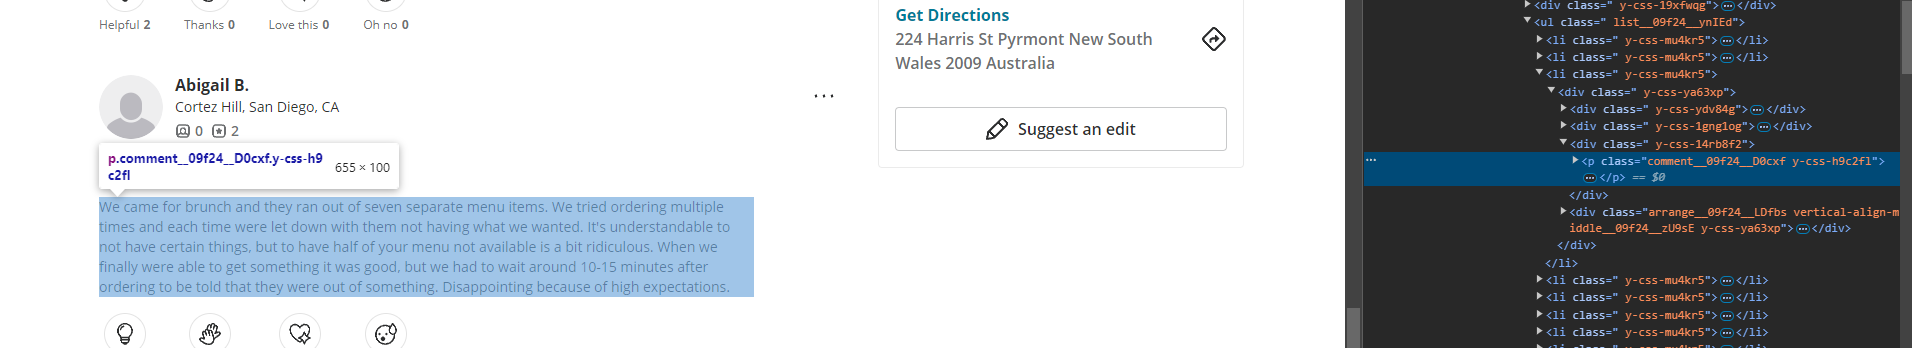

In [111]:
text = reviews[1]
text

"Cafe Giardino is an ideally situated cafe with an Italian flavour. As with most Italian themed cafe's the food is the main focus and it's all very tasty and fresh. Soups, lasagne, salad and a hude range of fresh sandwich / paninin ingredients are on display here. Service is not overly fast, but this is due to the fact that Giardinos is situated in the middle of a large shopping centre and the other choices are cheap fast food like McDonalds. Busy doesn't begin to describe how Giardinos can be, particularly on a Saturday, but if you manage to join the queue at the right time and find one of the many seats around the shopping centre you will be pleased with the quality of food on offer. You will be glad to take a welcome beak from uninspiring fast food choices out there"

In [112]:
inputs = tokenizer([text], padding=True, truncation=True, return_tensors='tf')

output = classifier(inputs)

predicted_class = tf.argmax(output, axis=1).numpy()[0]

predicted_emotion = emotion_labels[predicted_class]

print(f"Predicted emotion: {predicted_emotion}")

Predicted emotion: joy
